In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [134]:

test = pd.read_csv("test_lAUu6dG.csv")
train = pd.read_csv("train_ctrUa4K.csv")

test_original = test.copy()
train_original = train.copy()


In [135]:
test.head(3)
# print(test.info())
print(test.columns)
# train.head(3)
print(train.info())
print(train.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    ob

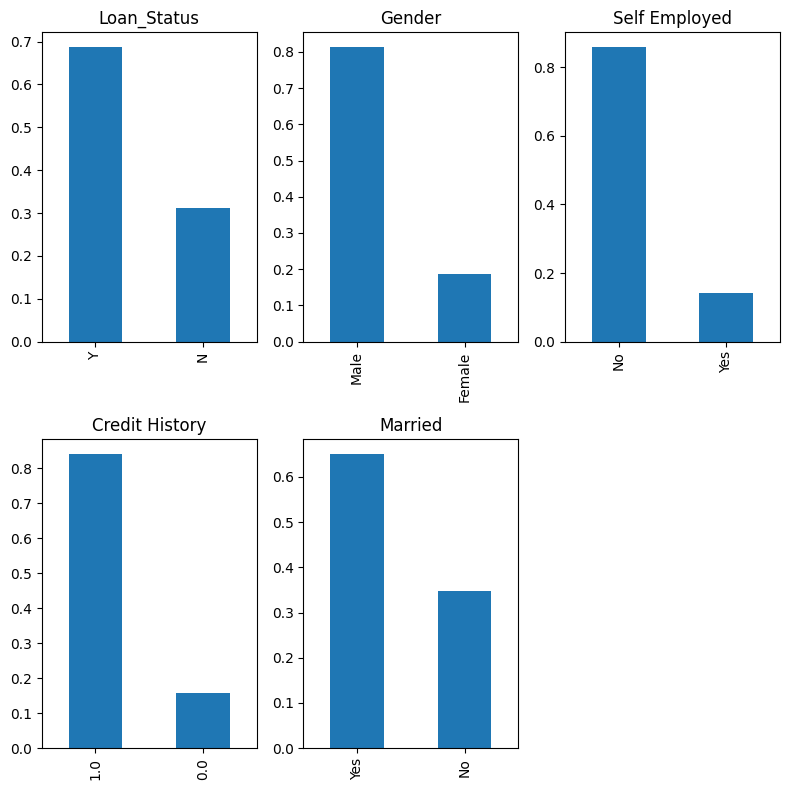

In [136]:
# Categorical variables are: Gender, Married, Sel_Employed, Loan_Status, Credit_Hostory = 5; 2 rows, 3 cols

plt.figure(figsize=(8, 8))

plt.subplot(2,  3, 1)

freq_train = train['Loan_Status'].value_counts(normalize = True).plot.bar(title = 'Loan_Status')
# # 68.7~ 69% accepted loan
# # 31.2~30% rejected loan

plt.subplot(2, 3, 2)
gender_train = train['Gender'].value_counts(normalize = True).plot.bar(title = 'Gender')

plt.subplot(2, 3, 3)
selfemp_train = train['Self_Employed'].value_counts(normalize = True).plot.bar(title = "Self Employed")

plt.subplot(2, 3, 4)
selfemp_train = train['Credit_History'].value_counts(normalize = True).plot.bar(title = "Credit History")

plt.subplot(2, 3, 5)
selfemp_train = train['Married'].value_counts(normalize = True).plot.bar(title = "Married")

plt.tight_layout()
plt.show()

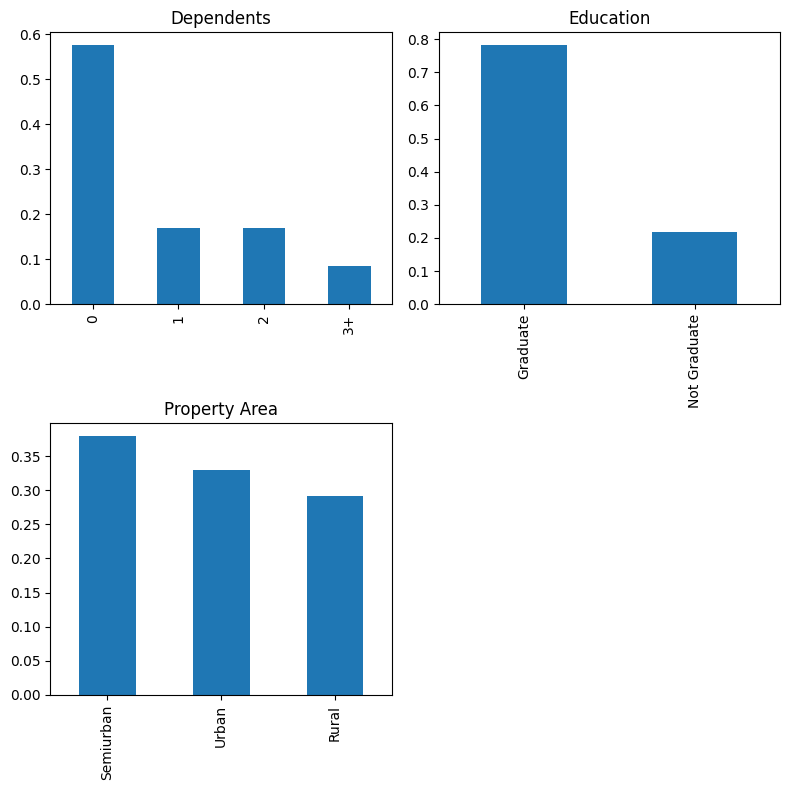

In [137]:
# ordinal data: Dependents, Education, Property Area
plt.figure(figsize=(8,8)) #width= 10, height= 2
plt.subplot(2, 2,1)
dep_train = train['Dependents'].value_counts(normalize= True).plot.bar(title = 'Dependents')

plt.subplot(2,2,2)
edu_train = train['Education'].value_counts(normalize= True).plot.bar(title= 'Education')

plt.subplot(2,2,3)
prop_train = train['Property_Area'].value_counts(normalize= True).plot.bar(title= 'Property Area')

plt.tight_layout()
plt.show()

<Figure size 400x800 with 0 Axes>

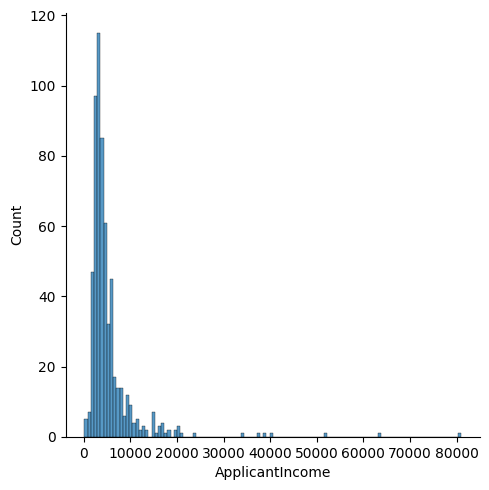

In [138]:
# numerical data

plt.figure(figsize= (4, 8)) #width = 4, height= 8

# plt.subplot(221)
sns.displot(train['ApplicantIncome'])
plt.show()
# left skewed data
# therefore, confirms the presence of outliners/extremes. 
# ml algorithm works better for normally distributed data


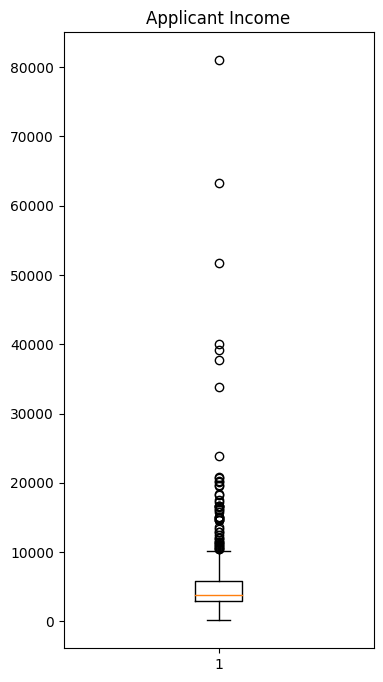

In [139]:
plt.figure(figsize= (4, 8))
plt.boxplot(train['ApplicantIncome'])
plt.title('Applicant Income')
plt.show()

<Figure size 400x800 with 0 Axes>

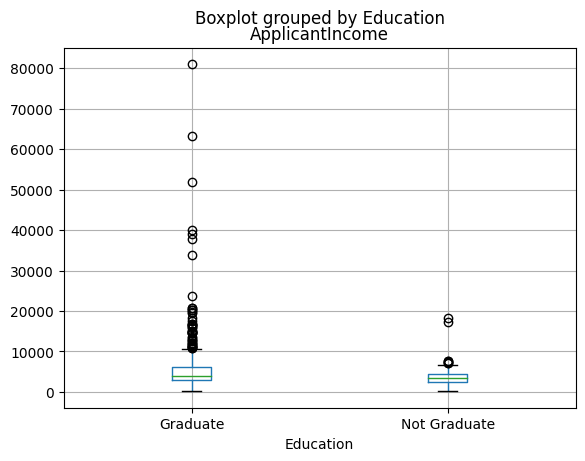

In [140]:
# using pandas for plotting
plt.figure(figsize=(4, 8))
train.boxplot(column= "ApplicantIncome", by='Education')
# plt.title("Applicant Income segregated by Education")
plt.show()

<Figure size 400x800 with 0 Axes>

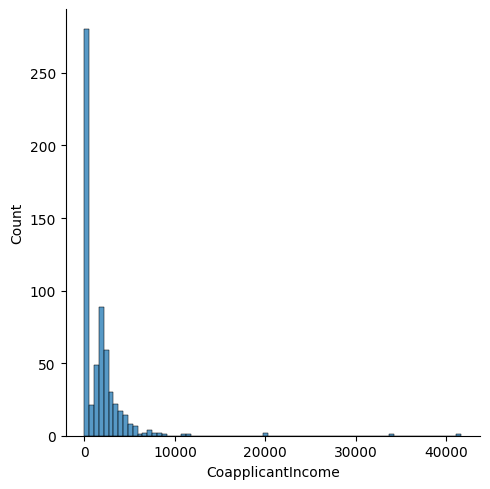

In [141]:
plt.figure(figsize= (4, 8)) #width = 4, height= 8

# plt.subplot(221)
sns.displot(train['CoapplicantIncome'])
plt.show()
# # left skewed data
# therefore, confirms the presence of outliners/extremes. 
# ml algorithm works better for normally distributed data

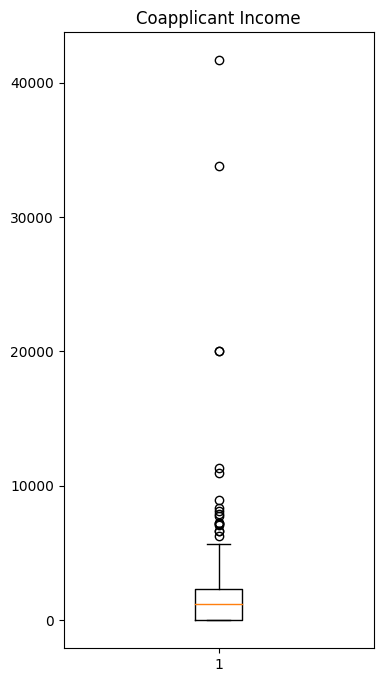

In [142]:
plt.figure(figsize= (4, 8))
plt.boxplot(train['CoapplicantIncome'])
plt.title('Coapplicant Income')
plt.show()

<Figure size 400x800 with 0 Axes>

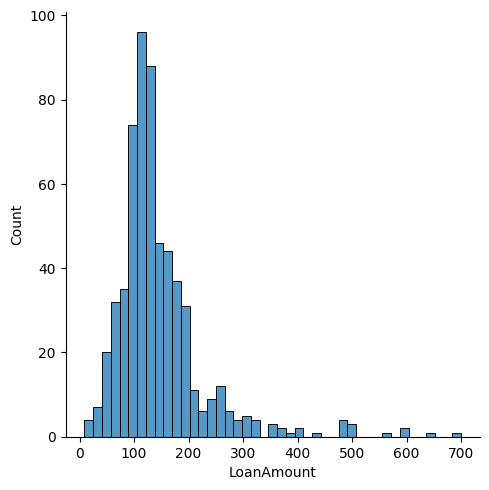

In [143]:
plt.figure(figsize= (4, 8)) #width = 4, height= 8

# plt.subplot(221)
sns.displot(train['LoanAmount'])
plt.show()

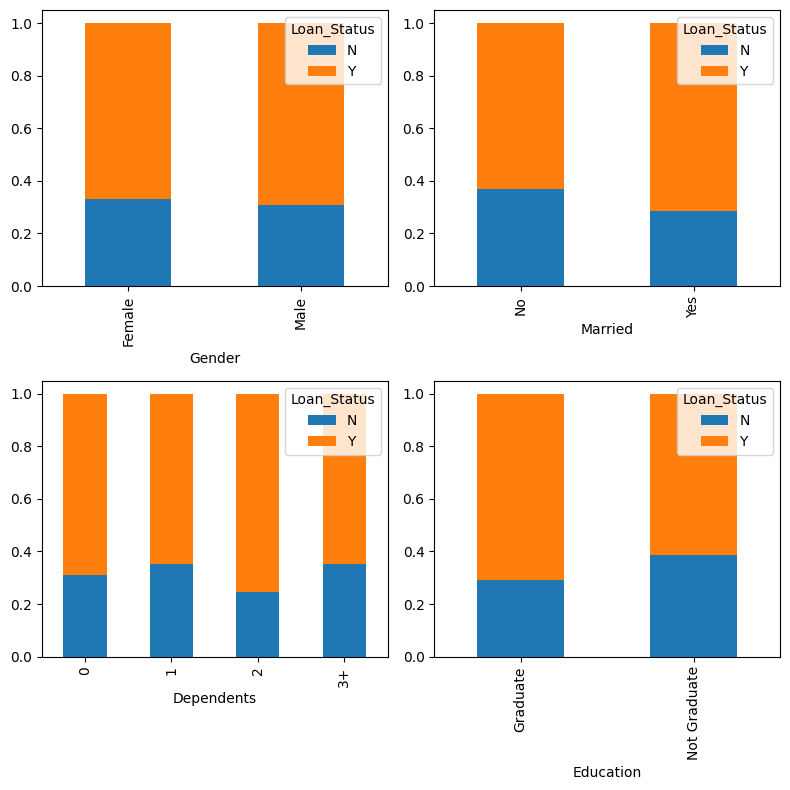

In [144]:
# Categorial Data vs Targeted Variable
# using crosstab which is cross-tabulation shows distribution/ frequency across 2 categorial variables
# plt.figure(figsize=(8, 12))
# not the  y-axis range (minimum and maximum values) would be the same for all subplots.
# initialising subplots
fig, axes = plt.subplots(nrows=2, ncols=2, sharey= False, figsize=(8, 8))
fig.subplots_adjust(hspace= 0.5)

gender_loan = pd.crosstab(train['Gender'], train["Loan_Status"])
gender_loan.div(gender_loan.sum(1).astype('float'), axis=0).plot(kind= "bar", stacked= True, ax=axes[0, 0])

# gender_loan.plot(kind= "bar", stacked= True)
# plt.show()
married_loan = pd.crosstab(train['Married'], train["Loan_Status"])
married_loan.div(married_loan.sum(1).astype('float'), axis=0).plot(kind= "bar", stacked= True, ax=axes[0, 1])


dependent_loan = pd.crosstab(train['Dependents'], train["Loan_Status"])
dependent_loan.div(dependent_loan.sum(1).astype('float'), axis=0).plot(kind= "bar", stacked= True, ax=axes[1, 0])

edu_loan = pd.crosstab(train['Education'], train["Loan_Status"])
edu_loan.div(edu_loan.sum(1).astype('float'), axis=0).plot(kind= "bar", stacked= True, ax=axes[1, 1])
plt.tight_layout()
plt.show()


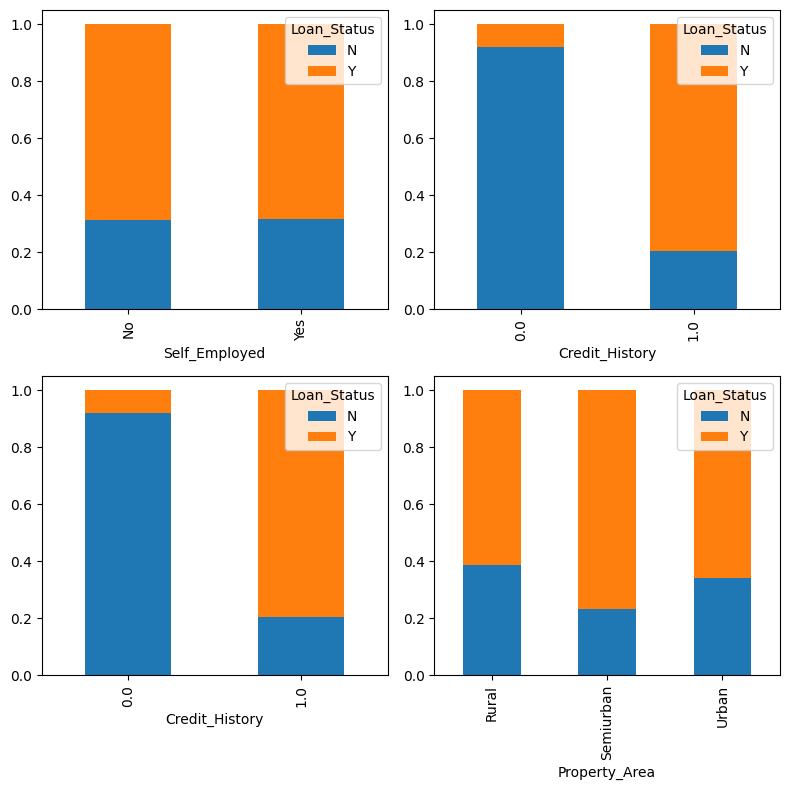

In [145]:
fig, axes = plt.subplots(nrows=2, ncols=2, sharey= False, figsize=(8, 8))
fig.subplots_adjust(hspace= 0.5)
# plt.figure(figsize= (4, 4)) 
# # Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
#        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
#        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
#       dtype='object')

selfemp_loan = pd.crosstab(train['Self_Employed'], train["Loan_Status"])
selfemp_loan.div(selfemp_loan.sum(1).astype('float'), axis=0).plot(kind= "bar", stacked= True, ax= axes[0,0])
# # we can't use this

ch_loan = pd.crosstab(train['Credit_History'], train["Loan_Status"])
ch_loan.div(ch_loan.sum(1).astype(float), axis=0).plot(kind= "bar", stacked= True, ax=axes[0, 1])

ch_loan = pd.crosstab(train['Credit_History'], train["Loan_Status"])
ch_loan.div(ch_loan.sum(1).astype(float), axis=0).plot(kind= "bar", stacked= True, ax=axes[1, 0])

pa_loan = pd.crosstab(train['Property_Area'], train["Loan_Status"])
pa_loan.div(pa_loan.sum(1).astype(float), axis=0).plot(kind= "bar", stacked= True, ax= axes[1, 1])

plt.tight_layout()
plt.show()

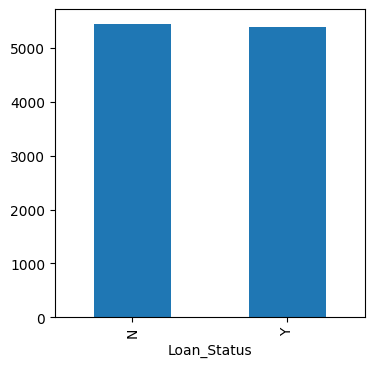

In [146]:
# Numerical data verus Targeted data
plt.figure(figsize= (4, 4))
api = train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()
# this doesn't show any valueable result so we will use bins and distribute over data among the bins. 

<Figure size 400x400 with 0 Axes>

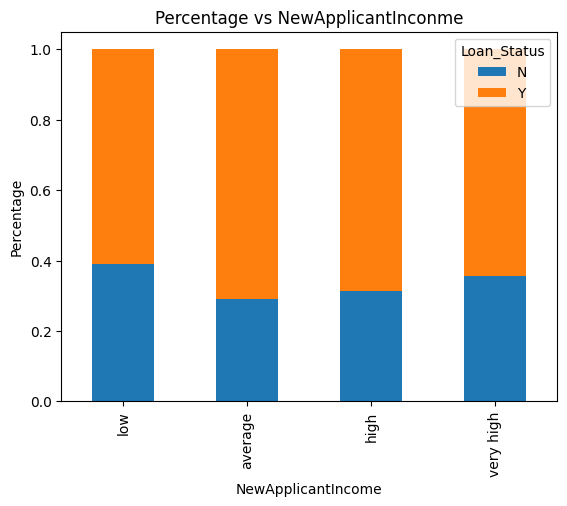

In [147]:
plt.figure(figsize= (4, 4))
bins=[0, 2000, 4000, 6000, 8100]
group = ['low', 'average', 'high', 'very high']
train['NewApplicantIncome'] = pd.cut(train['ApplicantIncome'], bins, labels= group)
# pd.cut recategorises the data among different bins
nap = pd.crosstab(train['NewApplicantIncome'], train['Loan_Status'])
nap.div(nap.sum(1).astype(float), axis= 0).plot(kind= 'bar', stacked= True)
plt.ylabel('Percentage')
plt.title('Percentage vs NewApplicantInconme')
plt.show()


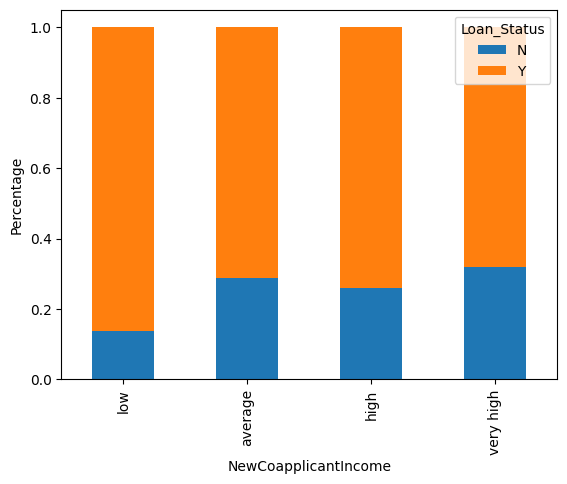

In [148]:
bins = [0, 1000, 2000, 3000, 4200]
groups= ['low', 'average', 'high', 'very high']
train['NewCoapplicantIncome'] = pd.cut(train['CoapplicantIncome'], bins, labels= groups)
ncai = pd.crosstab(train['NewCoapplicantIncome'], train['Loan_Status'])
ncai.div(ncai.sum(1).astype('float'), axis = 0).plot(kind= 'bar', stacked= True)
plt.ylabel("Percentage")
plt.show()
# since many coapplicantincome is nearly 0
#  therefore we have to make new variable: total income


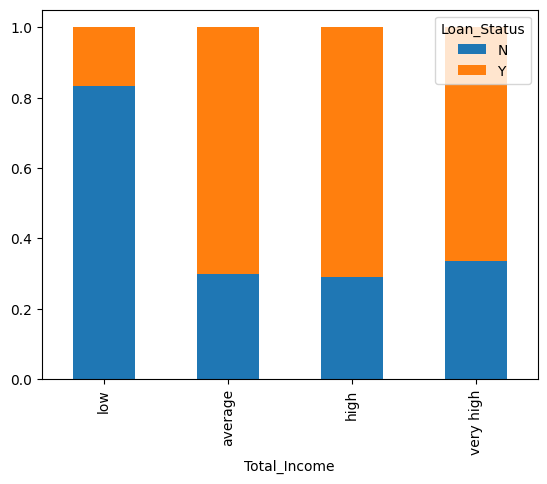

In [149]:
train['Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome'] 
bins= [0, 2000, 4000, 6000, 8100]
groups= ['low', 'average', 'high', 'very high']
train['Total_Income'] = pd.cut(train['Total_Income'], bins, labels= groups)
ti_loan= pd.crosstab(train['Total_Income'], train['Loan_Status'])
ti_loan.div(ti_loan.sum(1).astype(float), axis= 0).plot(kind= 'bar', stacked= True)
plt.show()


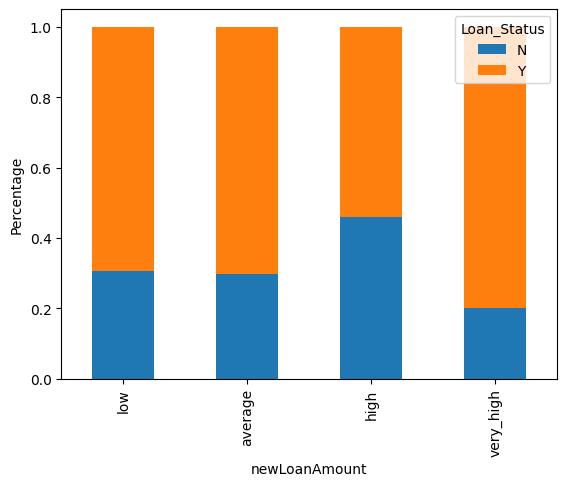

In [150]:

bins= [0, 100,300, 500, 700]
groups= ['low', 'average', 'high', 'very_high']
train['newLoanAmount'] = pd.cut(train['LoanAmount'], bins, labels= groups)
nla_loan= pd.crosstab(train['newLoanAmount'], train['Loan_Status'])
nla_loan.div(nla_loan.sum(1).astype(float), axis= 0).plot(kind= 'bar', stacked= True)
plt.ylabel('Percentage')
plt.show()
# Below results shows that the loan approved is greater for the people falls in low and average category. fulfills our hypothesis that the loan amount approved is high when loan amount is higher.

In [151]:
# we are dropping off unusable columns. bin columns
train = train.drop(['NewApplicantIncome', 'NewCoapplicantIncome', 'newLoanAmount'],  axis= 1)
# replacing 3+ with 3 for simiplicity
# Changing loan status too for it follows logistic regression
train['Dependents'].replace('3+', 3, inplace= True)
train["Loan_Status"].replace('N', 0, inplace= True)
train["Loan_Status"].replace('Y', 1, inplace= True)

C:\Users\Hp\AppData\Local\Temp\ipykernel_3692\730573524.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = train.corr()


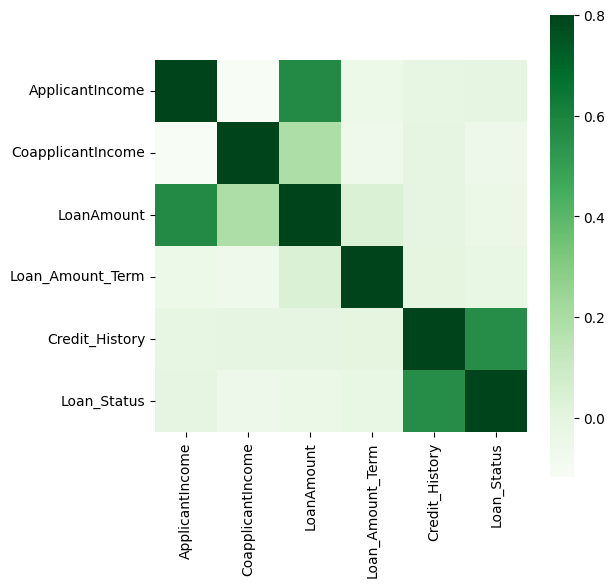

In [152]:
plt.figure(figsize=(6, 6))
matrix = train.corr()
sns.heatmap(matrix, vmax= 0.8, square= True, cmap='Greens')
plt.show()
# square=True: This parameter ensures that the heatmap is displayed as a square (i.e., the aspect ratio is equal). vmax=1.0: This parameter sets the maximum value for the color scale in the heatmap. 

# most correaltion is found in between ApplicantIncome, LoanAmount and Credit_History, Loan_Status

In [153]:
print(train.isnull().sum())
train["Gender"].fillna(train['Gender'].mode()[0], inplace= True)
# inplace=True ensures that the changes are applied directly to the original DataFrame.  The .mode()[0] part finds the mode (most frequent value) in the "Gender" column. 
train["Dependents"].fillna(train['Dependents'].mode()[0], inplace= True)
train["Self_Employed"].fillna(train['Self_Employed'].mode()[0], inplace= True)
train["Married"].fillna(train['Married'].mode()[0], inplace= True)
train["Credit_History"].fillna(train['Credit_History'].mode()[0], inplace= True)

train["Loan_Amount_Term"].fillna(train['Loan_Amount_Term'].mode()[0], inplace= True)

train["LoanAmount"].fillna(train["LoanAmount"].median(), inplace= True)


Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            22
Loan_Amount_Term      14
Credit_History        50
Property_Area          0
Loan_Status            0
Total_Income         131
dtype: int64


In [154]:
print(train.isnull().sum())

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
Total_Income         131
dtype: int64


In [155]:
test["Gender"].fillna(test['Gender'].mode()[0], inplace= True)
test["Dependents"].fillna(test['Dependents'].mode()[0], inplace= True)
test["Self_Employed"].fillna(test['Self_Employed'].mode()[0], inplace= True)
test["Married"].fillna(test['Married'].mode()[0], inplace= True)
test["Credit_History"].fillna(test['Credit_History'].mode()[0], inplace= True)

test["Loan_Amount_Term"].fillna(test['Loan_Amount_Term'].mode()[0], inplace= True)

test["LoanAmount"].fillna(test["LoanAmount"].median(), inplace= True)

print(test.isnull().sum())

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


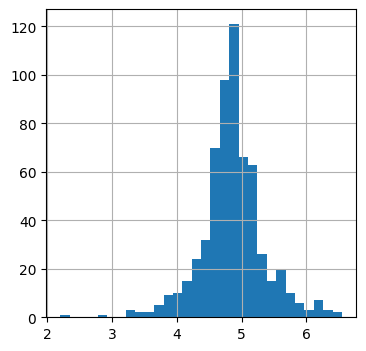

In [156]:
# one way to get rid of outliers is to used log transforrmation, which don't effect the smaller values but reduces the larger values.
import numpy as np
plt.figure(figsize=(4, 4))
train['logLoanAmount'] = np.log(train['LoanAmount']).hist(bins= 30)
test['logLoanAmount'] = np.log(test['LoanAmount'])
plt.show()
# now our distribution is close ti the normal distribution. the process of modeling is incomplete without accuracy check, cal the distance between orignal and predicted value, less distance, more accuracy, more distance, less accuracy



In [157]:
train= train.drop('Loan_ID', axis= 1)
test= test.drop('Loan_ID', axis= 1)
X= train.drop('Loan_Status', axis= 1)
Y= train.Loan_Status

X= pd.get_dummies(X)
train= pd.get_dummies(train)
test= pd.get_dummies(test)


In [158]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

x_train, x_cv, y_train, y_cv = train_test_split(X, Y, test_size= 0.3)

model= LogisticRegression()
model.fit(x_train, y_train)
# dataset divide into train and validate part.

C:\Users\Hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [159]:
LogisticRegression(C= 1.0, class_weight= None, dual= False, fit_intercept= True, intercept_scaling= 1, max_iter= 100, multi_class= "over",
                  n_jobs= 1, penalty= '12', random_state=1, solver='liblinear', tol= 0.0001, verbose=0, warm_start= False)


LogisticRegression(multi_class='over', n_jobs=1, penalty='12', random_state=1,
                   solver='liblinear')

In [160]:
train.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Married_No', 'Married_Yes', 'Dependents_3',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Total_Income_low', 'Total_Income_average', 'Total_Income_high',
       'Total_Income_very high',
       'logLoanAmount_AxesSubplot(0.125,0.11;0.775x0.77)'],
      dtype='object')

In [165]:
pred_cv= model.predict(x_cv)
# 
pred_text= model.predict(test)
# model.fit(train_x,train_y)

test.columns

In [ ]:
submission= pd.read_csv("sample_submission_49d68Cx.csv")

In [ ]:
# print('Predicted Values on Test Data',)

In [166]:
# print(name, accuracy_score(, pred_test))
print(accuracy_score(y_cv, pred_cv))

0.8162162162162162
